<a href="https://colab.research.google.com/github/andysingal/nlp/blob/main/spam_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
!nvidia-smi

Sun Jun  6 04:27:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [109]:
#!ssh-keygen -t rsa -b 4096

In [110]:
#!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

In [111]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQDX68ZCL9ZsjmhXQEGh01c1EuLaMtpFcr0QU7EL5KdPfgeC+tbgpr3laG1d5q55dGVVg5dKhS3aZyTeqjEU7D7rDFKYdJEW/Sm8EBQ6bmMW64clVtmaj04RKvib8xbcIGdEASoDVT7I5VpRESUrI6gBmLi50e0jiWbB4BhuP7vTDArLFvXF57k6/bj/X3lJ6OimJffb8pBi/BtNpLozzwdqrxmALbi9fZAk8NXnENAxe3nlskZ6W+nRWxwsS6gw6DoImC5+1EGnvYzuJ0hhEFkc42nXyrRsR8WuaTdBTRXRqhDhJxYBbIouHHfayXdD6Guao/2gUUohstcvDfEm/OlNP+JYyo54otuh3YpgnaEoFa99Z3BMsh0103ThEmzUXUW0alMszCm+0/nYd5UUeYDSRvK6Ayf0A/ync45S8Z3qc39qojl3RXrfl5d4d2TUmHl0XJWPwVqJi7rMWOwLQWbSCJRwr3zJLB+TSA5Mcqtt9jpmuCPZIYEkNnPjPhntBB0hTdGNm5ZRFNuuefipfN7/vxwgLs5uuTrICHIe3Ys3qIdsMekc0Y+m43mgnVUIp+x+LVCNh5c56oWjGQoOipBowfbngDdEE9cDpSFdm8+yXCa0nOo6l6k9/u8pa9hCDOh8M93vF31ceXjwBDmi/gZvCeQoXHr//pXxnGAVSENg1Q== root@3a5b4c44adb1


In [112]:
#!ssh -T git@github.com

In [113]:
#!pip install git+ssh://git@github.com/andysingal/preprocess_andy.git

In [114]:
#!python -m textblob.download_corpora

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import preprocess_andy as ps

In [116]:
df = pd.read_csv('drive/MyDrive/NLP/spam.tsv', sep='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [117]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [118]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


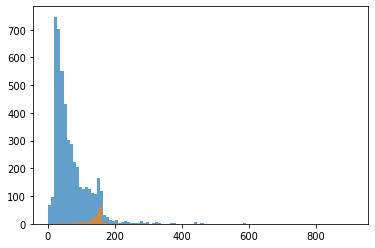

In [119]:
plt.hist(df[df['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(df[df['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

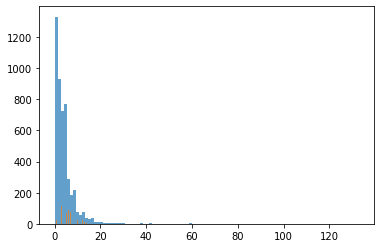

In [120]:
plt.hist(df[df['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(df[df['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test =  train_test_split(df['message'], df['label'], test_size = 0.3, random_state =0, shuffle = True)

#2) Building the Model (Random Forest)

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [124]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [125]:
classifier.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

#3) Predicting the results (Random Forest)

In [126]:
y_pred = classifier.predict(X_test)

In [127]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [128]:
accuracy_score(y_test, y_pred)

0.9766746411483254

In [129]:
confusion_matrix(y_test, y_pred)

array([[1451,    0],
       [  39,  182]])

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1451
        spam       1.00      0.82      0.90       221

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.98      1672



#4) Building the Model (SVM)

In [131]:
from sklearn.svm import SVC

In [132]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])

In [133]:
svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ov

#5) Predicting the results (SVM)

In [134]:
y_pred = svm.predict(X_test)

In [135]:
accuracy_score(y_test, y_pred)

0.867822966507177

In [136]:
confusion_matrix(y_test, y_pred)

array([[1451,    0],
       [ 221,    0]])

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      1451
        spam       0.00      0.00      0.00       221

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.87      0.81      1672



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [139]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [140]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['ham']
